In [20]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")
%matplotlib inline

In [21]:
df = pd.read_csv('../chocolate.csv')

In [22]:
df.drop(['Unnamed: 0', 'ref', 'beans'], axis=1, inplace=True)

In [23]:
df = df.fillna('no value')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   company                           2224 non-null   object 
 1   company_location                  2224 non-null   object 
 2   review_date                       2224 non-null   int64  
 3   country_of_bean_origin            2224 non-null   object 
 4   specific_bean_origin_or_bar_name  2224 non-null   object 
 5   cocoa_percent                     2224 non-null   float64
 6   rating                            2224 non-null   float64
 7   counts_of_ingredients             2224 non-null   int64  
 8   cocoa_butter                      2224 non-null   object 
 9   vanilla                           2224 non-null   object 
 10  lecithin                          2224 non-null   object 
 11  salt                              2224 non-null   object 
 12  sugar 

#### Have look at distribution of rating

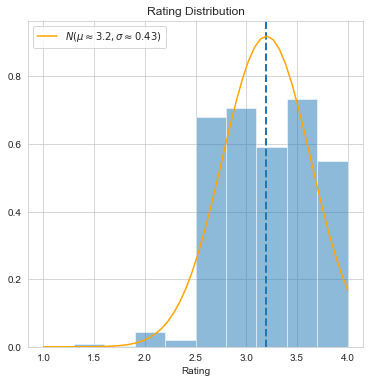

In [25]:
from scipy.stats import norm

mean = np.mean(df['rating'])
std = np.std(df['rating'], ddof=1)
xrange = np.linspace(np.min(df['rating']), np.max(df['rating']))

plt.figure(figsize=(6,6))
plt.hist(df['rating'], alpha=0.5, density=True)
plt.axvline(x=df['rating'].mean(), linestyle='--', linewidth=2)
plt.plot(xrange, norm.pdf(xrange, mean, std), color='orange',
         label='$N$' + f'$( \mu \\approx {np.round(mean,2)}, \sigma \\approx {np.round(std,2)} )$' )
plt.xlabel('Rating')
plt.title('Rating Distribution')
plt.legend()
plt.show()

# Cocoa Percent

#### the only numeric feature is cocoa_percent (treat discrete values as categorical)

C:\Users\songh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


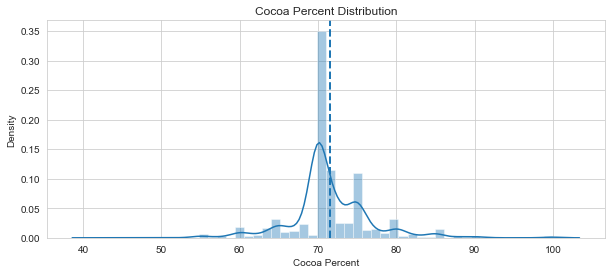

In [26]:
plt.figure(figsize=(10,4))
sns.distplot(df['cocoa_percent'])
plt.axvline(x=df['cocoa_percent'].mean(), linestyle='--', linewidth=2)
plt.xlabel('Cocoa Percent')
plt.title('Cocoa Percent Distribution')
plt.show()

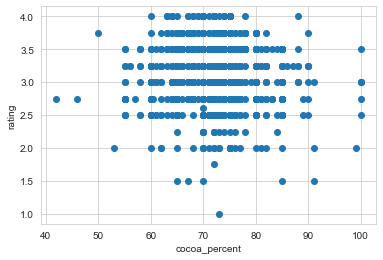

In [27]:
plt.figure(figsize=(6,4))
plt.scatter(x='cocoa_percent', y='rating', data=df)
plt.xlabel('cocoa_percent')
plt.ylabel('rating')
plt.show()

# Counts of Ingredients

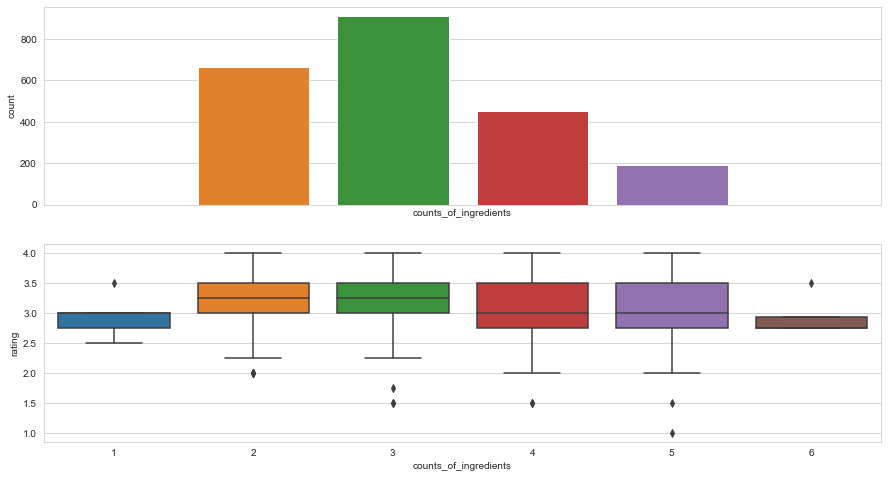

In [28]:
fig, ax = plt.subplots(2, 1, figsize=(15,8), sharex=True)
sns.countplot(x='counts_of_ingredients', data=df, ax=ax[0])
sns.boxplot(x='counts_of_ingredients', y='rating', data=df, ax=ax[1])
plt.show()

# Country of Origin

In [29]:
country_ct = df['country_of_bean_origin'].value_counts(ascending=False).to_frame().reset_index()
country_ct.rename(columns={'index':'country', 'country_of_bean_origin':'count'}, inplace=True)
country_ct

,country,count
0,Venezuela,238
1,Peru,207
2,Dominican republic,200
3,Ecuador,194
4,Madagascar,157
...,...,...
57,Tobago,1
58,St.vincent-grenadines,1
59,Martinique,1
60,Gabon,1


In [30]:
from pandas.api.types import CategoricalDtype
top_10_countries = country_ct['country'].iloc[range(10)].tolist()
#top_10_countries
count_order = CategoricalDtype(
    top_10_countries, 
    ordered=True
)
count_order

CategoricalDtype(categories=['Venezuela', 'Peru', 'Dominican republic', 'Ecuador',
                  'Madagascar', 'Blend', 'Nicaragua', 'Brazil', 'Bolivia',
                  'Belize'],
, ordered=True)

In [31]:
df_10_countries = df.loc[df['country_of_bean_origin'].isin(top_10_countries)]
df_10_countries['country_of_bean_origin'] = df_10_countries['country_of_bean_origin'].astype(count_order)
df_10_countries.sort_values('country_of_bean_origin')

C:\Users\songh\AppData\Local\Temp/ipykernel_7640/248605744.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_10_countries['country_of_bean_origin'] = df_10_countries['country_of_bean_origin'].astype(count_order)


,company,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,rating,counts_of_ingredients,cocoa_butter,vanilla,lecithin,salt,sugar,sweetener_without_sugar,first_taste,second_taste,third_taste,fourth_taste
715,Durci,U.S.A,2015,Venezuela,"Carenero, Empyrean Sabor",70.0,3.25,3,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,cherry,earthy,tobacco,no value
509,Choklat,Canada,2009,Venezuela,Ocumare,70.0,3.00,4,have_cocoa_butter,have_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,slow,fatty,subdued,nutty
1972,Suruca Chocolate,Venezuela,2016,Venezuela,Venezuela,60.0,3.00,3,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,sticky,sweet,nutty,roasty
1973,Suruca Chocolate,Venezuela,2016,Venezuela,Venezuela,70.0,2.75,3,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,sticy,nutty,roasty,off notes
1976,Sweet Escalier,Japan,2018,Venezuela,Chuao,75.0,3.25,5,have_cocoa_butter,have_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,acidic,cocoa,dried fruit,no value
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,Bankston,U.S.A,2019,Belize,Belize,72.0,2.50,3,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,gritty,fatty,sour,off
2018,Taza,U.S.A,2014,Belize,Belize,68.0,3.00,3,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,coarse,watering,sweet,no value
2221,Zotter,Austria,2018,Belize,Maya Mtn,72.0,3.50,3,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,muted,roasty,accessible,no value
1143,Kto,U.S.A,2014,Belize,Belize,90.0,3.25,2,have_not_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,intense,spicy,pungent,no value


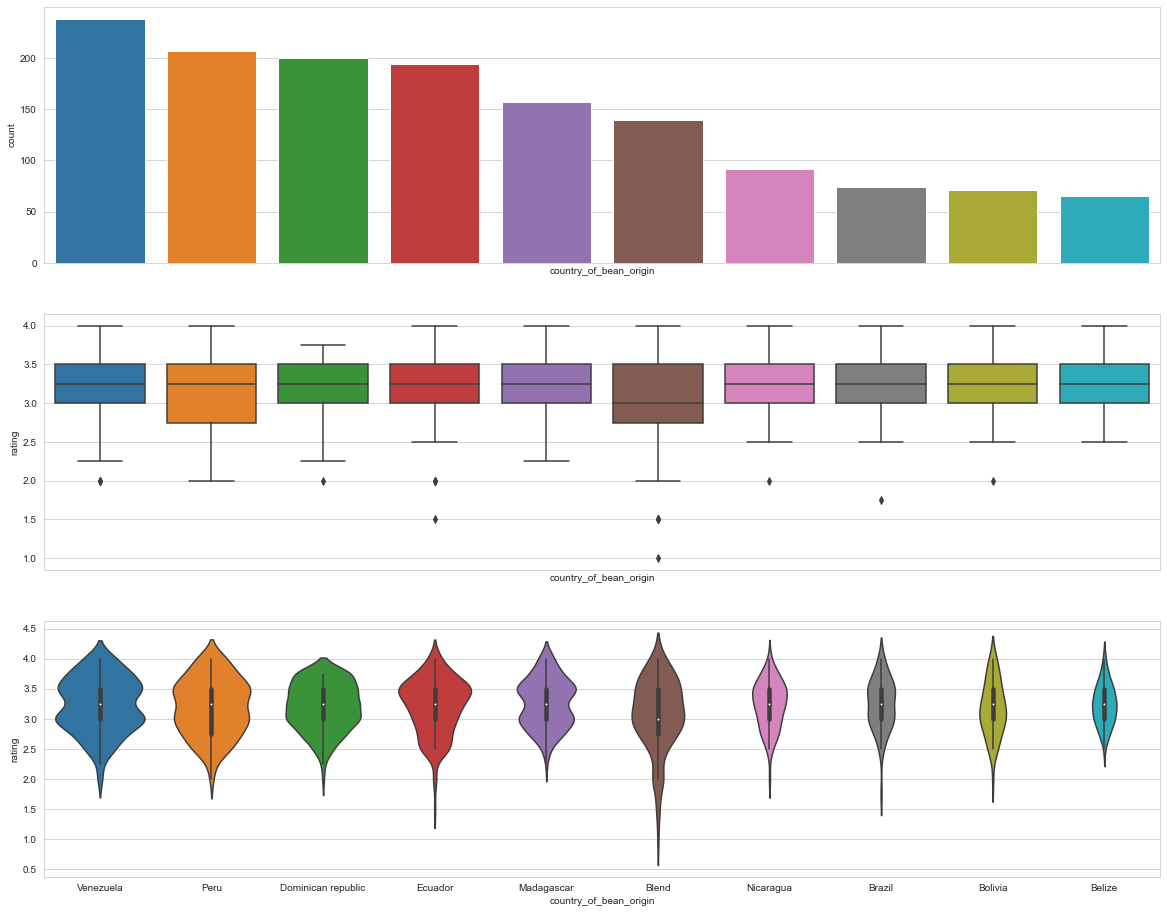

In [39]:
fig, ax = plt.subplots(3, 1, figsize=(20,16), sharex=True)
sns.countplot(x='country_of_bean_origin', data=df_10_countries.sort_values('country_of_bean_origin'), ax=ax[0])
sns.boxplot(x="country_of_bean_origin", y="rating", data=df_10_countries.sort_values('country_of_bean_origin'), ax=ax[1])
sns.violinplot(x="country_of_bean_origin", y="rating", data=df_10_countries.sort_values('country_of_bean_origin')
               , scale='count', ax=ax[2])
plt.show()

# Company Location

In [14]:
location_ct = df['company_location'].value_counts(ascending=False).to_frame().reset_index()
location_ct.rename(columns={'index':'location', 'company_location':'count'}, inplace=True)

In [15]:
top_20_locations = location_ct['location'].iloc[range(20)].tolist()
df_20_locations = df.loc[df['company_location'].isin(top_20_locations)]
comp_order = CategoricalDtype(
    top_20_locations, 
    ordered=True
)
comp_order
df_20_locations['company_location'] = df_20_locations['company_location'].astype(comp_order)
df_20_locations.sort_values('company_location')

C:\Users\songh\AppData\Local\Temp/ipykernel_7640/124007518.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_20_locations['company_location'] = df_20_locations['company_location'].astype(comp_order)


,company,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,rating,counts_of_ingredients,cocoa_butter,vanilla,lecithin,salt,sugar,sweetener_without_sugar,first_taste,second_taste,third_taste,fourth_taste
0,5150,U.S.A,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.75,3,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,cocoa,blackberry,full body,no value
1219,Letterpress,U.S.A,2019,Jamaica,"Bachelor's Hall, batch 0001",70.0,3.25,3,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,woody,mocha,molasses,no value
1218,Letterpress,U.S.A,2018,Ghana,Ashanti,70.0,3.75,3,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,brownie,no value,no value,no value
1217,Letterpress,U.S.A,2017,Belize,"Maya Mtn, Batch 18, Heirloom",70.0,3.25,2,have_not_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,smokey,mild berry,no value,no value
1216,Letterpress,U.S.A,2017,Honduras,"La Masica, Batch 7, FHIA",70.0,3.50,2,have_not_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,strong raspberry,mocha,no value,no value
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1134,Krak,Netherlands,2017,Mexico,Xoconusco,70.0,3.25,2,have_not_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,medium roast,nutty,no value,no value
52,Alexandre,Netherlands,2017,Ecuador,"Winak Coop, Napo",70.0,3.50,3,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,sandy,green,floral,no value
53,Alexandre,Netherlands,2017,Nicaragua,"La Dalia, Matagalpa",70.0,3.50,3,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,sandy,sweet,nibby,no value
1139,Krak,Netherlands,2018,Madagascar,Mava Sa Ferme D'ottange,70.0,3.00,2,have_not_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,roasty,nutty,no value,no value


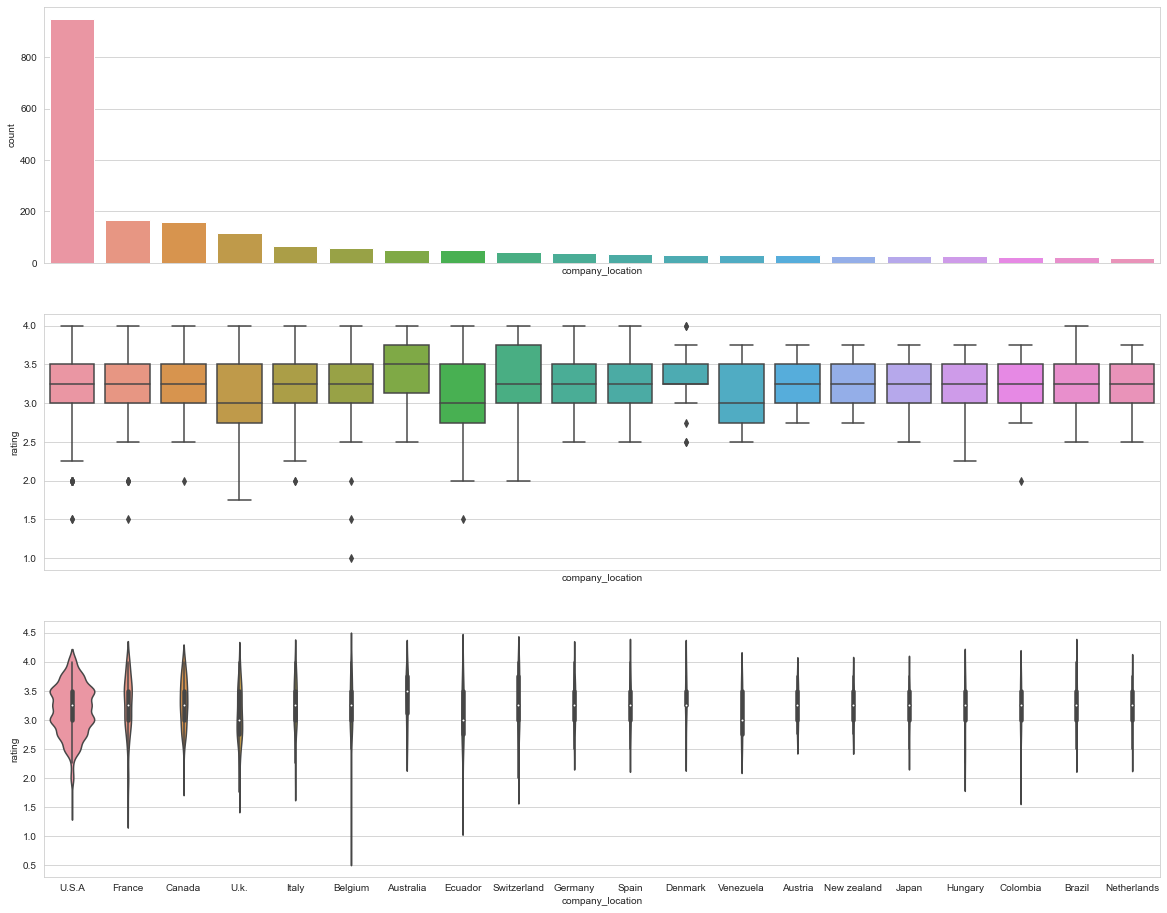

In [38]:
fig, ax = plt.subplots(3, 1, figsize=(20,16), sharex=True)
sns.countplot(x='company_location', data=df_20_locations, ax=ax[0])
sns.boxplot(x="company_location", y="rating", data=df_20_locations, ax=ax[1])
sns.violinplot(x="company_location", y="rating", data=df_20_locations, scale='count', ax=ax[2])
plt.show()

In [17]:
df.country_of_bean_origin.unique()

array(['Madagascar', 'Dominican republic', 'Tanzania', 'Peru', 'Bolivia',
       'Venezuela', 'Ecuador', 'Brazil', 'Papua new guinea', 'Burma',
       'Panama', 'Colombia', 'Cuba', 'Togo', 'Sao tome', 'Mexico', 'Fiji',
       'Vanuatu', 'Indonesia', 'Trinidad', 'Vietnam', 'Nicaragua',
       'Ghana', 'Belize', 'Blend', 'Grenada', 'Jamaica', 'Guatemala',
       'Costa rica', 'Honduras', 'Haiti', 'India', 'Congo', 'Philippines',
       'Solomon islands', 'Uganda', 'Malaysia', 'Sri lanka',
       'Ivory coast', 'Gabon', 'Taiwan', 'Puerto rico', 'Martinique',
       'St. lucia', 'Australia', 'Liberia', 'Sierra leone', 'Nigeria',
       'U.s.a.', 'St.vincent-grenadines', 'Thailand', 'Tobago', 'Bolvia',
       'Sumatra', 'El salvador', 'Cameroon', 'Samoa',
       'Sao tome & principe', 'Principe', 'Sulawesi', 'Suriname',
       'Dr congo'], dtype=object)

In [18]:
    df.company_location.unique()

array(['U.S.A', 'France', 'Fiji', 'Vanuatu', 'Ecuador', 'Mexico',
       'Switzerland', 'Netherlands', 'Spain', 'Peru', 'Canada', 'Italy',
       'Brazil', 'Nicaragua', 'U.k.', 'Australia', 'Philippines', 'Wales',
       'Belgium', 'Vietnam', 'Germany', 'Singapore', 'Venezuela',
       'Malaysia', 'Russia', 'South korea', 'Taiwan', 'Puerto rico',
       'Colombia', 'Japan', 'New zealand', 'Costa rica', 'Hungary',
       'Scotland', 'Martinique', 'Sao tome', 'St. lucia', 'Guatemala',
       'South africa', 'Dominican republic', 'Sao tome & principe',
       'Bolivia', 'Portugal', 'Norway', 'Denmark', 'Grenada', 'Israel',
       'India', 'St.vincent-grenadines', 'Czech republic', 'Thailand',
       'Finland', 'Madagascar', 'Sweden', 'Poland', 'Austria', 'Honduras',
       'U.a.e.', 'Lithuania', 'Ireland', 'Chile', 'Ghana', 'Iceland',
       'Argentina', 'Suriname', 'El salvador'], dtype=object)